In [24]:
import sys 
sys.path.append('..')

In [25]:
from segment.sam_script import * 
from segment.dino_script import get_dino_results
from segment.utils import load_resize_image
import torch 
from segment.utils import unload_mask
from segment.utils import overlay_mask 


In [26]:

sam_model = get_sam_model()

In [29]:
url = "https://i.pinimg.com/originals/f0/72/20/f072205304f54c828b279f9cfdee5548.jpg"


Prompt: leg


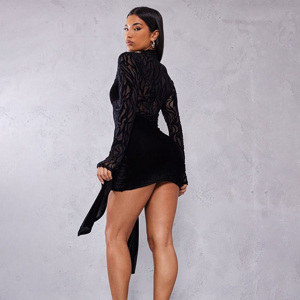

In [30]:
image = load_resize_image(url, 1024)
text_prompt = 'leg'
print(f"Prompt: {text_prompt}")
image.resize((300,300))

In [31]:
df = get_dino_results([image], text_prompt)

In [32]:
df.asdict()

[{'box': [356.17132568359375,
   622.458251953125,
   530.9744873046875,
   1022.9109497070312],
  'score': 0.6725867390632629,
  'label': 'leg'},
 {'box': [492.6457824707031,
   617.8862915039062,
   613.0123291015625,
   1022.67822265625],
  'score': 0.6724868416786194,
  'label': 'leg'}]

In [33]:
with torch.no_grad():
    # dino_images = torch.stack([transform_image_dino(image) for image in images])
    sam_images = torch.stack([sam_transform_image(im) for im in [image]])

    # dino_images = dino_images.to(DEVICE)
    sam_images = sam_images.to(DEVICE)

In [34]:
sam_outputs = sam_detect(sam_model, sam_images, df.boxes)

In [79]:
output = {}

total = len(sam_outputs[0].get('masks'))

for row in range(0,total):
    mask = sam_outputs[0].get('masks')[row]
    iou = sam_outputs[0].get('iou_predictions')[row]
    low_res = sam_outputs[0].get('low_res_logits')[row]
    
    
    output[row] = {
        "mask": unload_mask(mask),
        "iou": iou.item(),
        "low_res": low_res,
    }

[0.904793918132782]


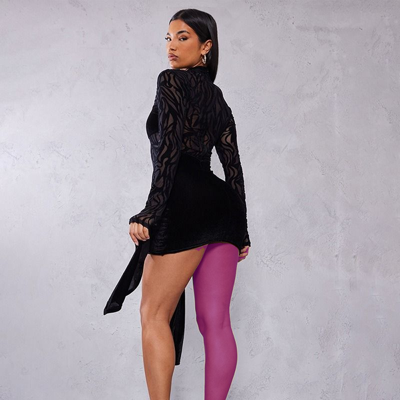

: 

In [139]:
num = 1
row = output[0]

mask = row.get('masks')[num]
score = row.get('scores')[num]

print(score)
overlay_mask(image, mask).resize((400,400))